<h1>Ricky Anggari
<h1>2209106037
<h1>Kelas A2'2022

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

Pertama tama,kita import tensorflow dan matplotlib

Lalu disini saya mengambil gambar dari google,dimana gambar tersebut memperlihatkan kondisi hujan

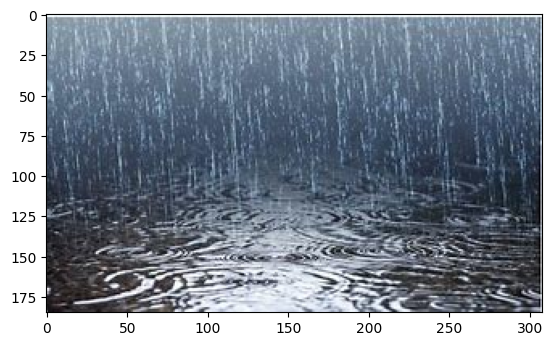

In [4]:
image_path = 'hujan.jpeg'

## Baca Gambar sebagai byte
image_bytes = tf.io.read_file(image_path)

##Decode Gambar menjadi tensor
image_tensor = tf.image.decode_image(image_bytes)

#Tampilkan Gambar
plt.imshow(image_tensor)
plt.show()

Link Dataset = https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset

Kemudian saya memutarbalik/horizontal flip ke gambar tersebut

In [5]:
def visualize_data(original_image,process_image):
    plt.figure(figsize = (10,3))
    
    ##Gambar Original
    plt.subplot(1,2,1)
    plt.imshow(original_image)
    plt.title("original image")
    plt.axis("off")
    
    #Gambar Process
    plt.subplot(1,2,2)
    plt.imshow(process_image)
    plt.title("processed image")
    plt.axis("off")
    
    plt.show()

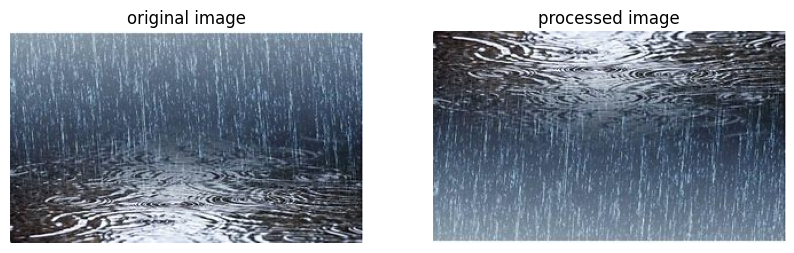

In [6]:
vertical_image = tf.image.flip_up_down(image_tensor)
visualize_data(image_tensor,vertical_image)

Setelah dibalik,saya melakukan vertical flip alias membuatnya menjadi berlawanan arah

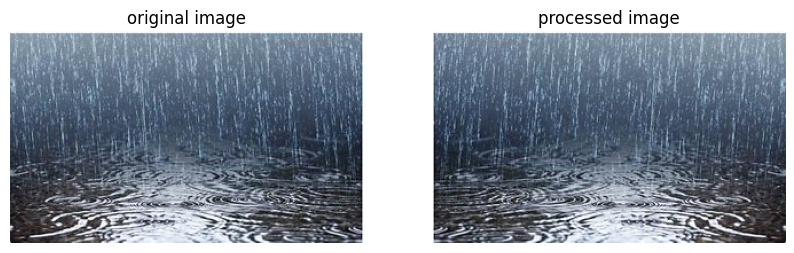

In [7]:
horizontal_image = tf.image.flip_left_right(image_tensor)
visualize_data(image_tensor,horizontal_image)

Kemudian menurunkan kecerahannya

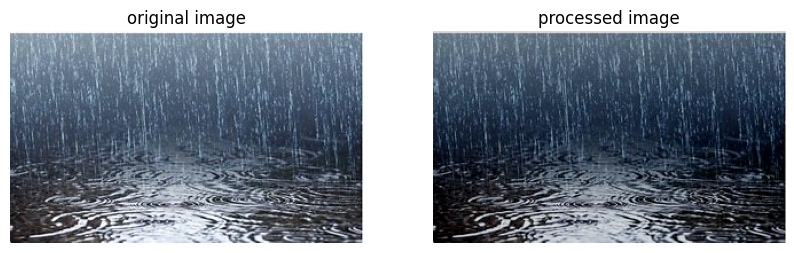

In [8]:
max_delta = 0.8

gambar_terang = tf.image.random_brightness(
    image_tensor,
    max_delta
)

visualize_data(image_tensor,gambar_terang)

Kemudian membuat perbedaan kontrasnya

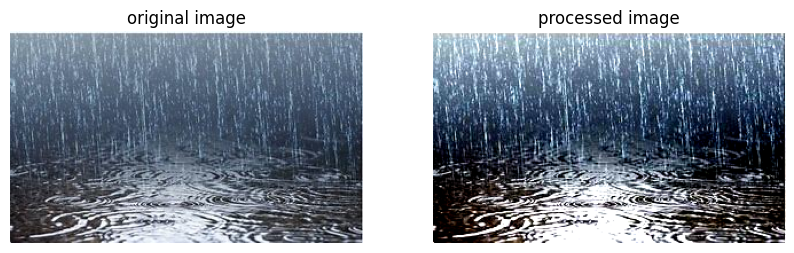

In [9]:
min_delta = 1.0
max_delta = 2.0

gambar_contrast = tf.image.random_contrast(
    image_tensor,
    min_delta,
    max_delta
)

visualize_data(image_tensor,gambar_contrast)

Kemudian disini saya mengimport image data generator  untuk melakukan preprocessing image

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
IMG_PATH = "dataset"

img_datagen = ImageDataGenerator(
    rotation_range = 0.45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [13]:
img_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    
    #Parameter Untuk menyimpan data
    class_mode = "categorical",
    save_to_dir = "Augmented",
    save_prefix = "aug",
    save_format = "jpg" 
)

Found 1530 images belonging to 6 classes.


Karena dataset saya ada 6 kelas,maka for i in range(6)

In [14]:
for i in range(6):
    img_generator.next()

In [15]:
img_datagen = ImageDataGenerator(
    rescale = 1. /255,
    validation_split = 0.1,
)

train_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    subset = 'training',
    class_mode = "categorical"
)
vertical_image_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    subset = 'validation',
    class_mode = "categorical"
)

Found 1377 images belonging to 6 classes.
Found 153 images belonging to 6 classes.


Kemudian kita compile modelnya

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation="relu", input_shape= [150,150,3]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax"),
])

In [17]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Kemudian disini saya melakukan epochs,tapi sebelum itu,saya mengimport early stopping supaya bisa secara otomatis menghentikan ketika sudah cukup di epochs

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
history = model.fit(
    train_generator,
    validation_data = vertical_image_generator,
    epochs =100,
    callbacks=early_stop
    )

Epoch 1/100
44/44 [==============================] - 58s 1s/step - loss: 0.6888 - accuracy: 0.7531 - val_loss: 0.9035 - val_accuracy: 0.7386
Epoch 2/100
44/44 [==============================] - 57s 1s/step - loss: 0.6879 - accuracy: 0.7553 - val_loss: 0.8064 - val_accuracy: 0.7451
Epoch 3/100
44/44 [==============================] - 57s 1s/step - loss: 0.5762 - accuracy: 0.7908 - val_loss: 0.8765 - val_accuracy: 0.7386
Epoch 4/100
44/44 [==============================] - 63s 1s/step - loss: 0.3962 - accuracy: 0.8686 - val_loss: 0.8991 - val_accuracy: 0.6863
Epoch 5/100
44/44 [==============================] - 65s 1s/step - loss: 0.3047 - accuracy: 0.8853 - val_loss: 0.7606 - val_accuracy: 0.7843
Epoch 6/100
44/44 [==============================] - 59s 1s/step - loss: 0.2564 - accuracy: 0.9020 - val_loss: 0.7124 - val_accuracy: 0.8170
Epoch 7/100
44/44 [==============================] - 60s 1s/step - loss: 0.1605 - accuracy: 0.9535 - val_loss: 0.9636 - val_accuracy: 0.7255
Epoch 8/100
4

Kemudian disini saya memperlihatkan grafik antara loss dan akurasinya

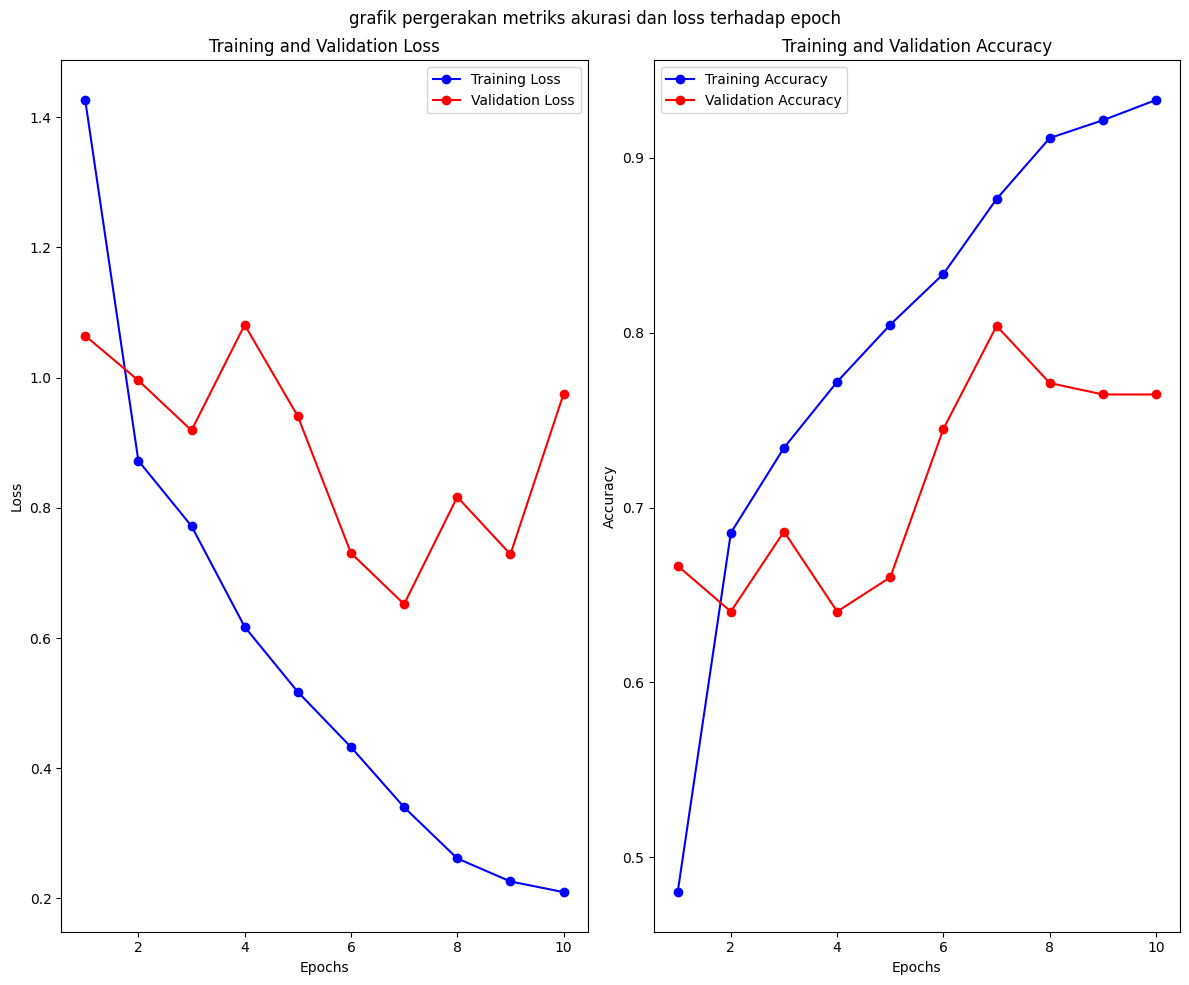

In [ ]:
# Ambil data pelatihan
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Ambil data validasi
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Jumlah epoch
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 10))
plt.suptitle('grafik pergerakan metriks akurasi dan loss terhadap epoch')

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
